## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Loading The Data

In [5]:
data = pd.read_csv("multiple_linear_regression.csv")

In [7]:
data.head(10)

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Handling The Null Values

In [12]:
data.dropna()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [14]:
data.shape

(200, 4)

## Splitting the Data

In [17]:
output_col = "Target"

In [19]:
x = data.iloc[:, data.columns != output_col]

In [21]:
y = data.loc[:, output_col]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [29]:
x_train

,Feature 1,Feature 2,Feature 3
188,286.0,13.9,3.7
170,50.0,11.6,18.4
107,90.4,0.3,23.2
65,69.0,9.3,0.9
109,255.4,26.9,5.5
...,...,...,...
50,199.8,3.1,34.6
184,253.8,21.3,30.0
165,234.5,3.4,84.8
7,120.2,19.6,11.6


In [31]:
y_train

188    15.9
170     8.4
107     8.7
65      9.3
109    19.8
       ... 
50     11.4
184    17.6
165    11.9
7      13.2
70     18.3
Name: Target, Length: 140, dtype: float64

In [33]:
x_test

,Feature 1,Feature 2,Feature 3
96,197.6,3.5,5.9
5,8.7,48.9,75.0
116,139.2,14.3,25.6
35,290.7,4.1,8.5
183,287.6,43.0,71.8
160,172.5,18.1,30.7
54,262.7,28.8,15.9
134,36.9,38.6,65.6
90,134.3,4.9,9.3
191,75.5,10.8,6.0


In [35]:
y_test

96     11.7
5       7.2
116    12.2
35     12.8
183    26.2
160    14.4
54     20.2
134    10.8
90     11.2
191     9.9
139    20.7
142    20.1
177    11.7
26     15.0
89     16.7
140    10.9
171    14.5
23     15.5
132     5.7
37     14.7
151    11.6
28     18.9
85     15.2
93     22.2
174    11.5
75      8.7
18     11.3
105    19.2
121     7.0
130     1.6
33     17.4
46     10.6
168    17.1
169    15.0
11     17.4
166     8.0
81     12.3
111    21.8
67     13.4
147    25.4
86     12.0
182     8.7
69     22.3
125    10.6
42     20.7
77     14.2
62     15.7
154    15.6
59     18.4
148    10.9
175    27.0
24      9.7
143    10.4
64     18.0
196     9.7
40     16.6
112    14.1
52     22.6
145    10.3
136     9.5
Name: Target, dtype: float64

# <font color = "red"> Multiple Linear Regression</font>

## Training the Data

In [38]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [40]:
lr.coef_

array([ 0.04374167,  0.19818858, -0.00520108])

In [42]:
lr.intercept_

3.2231085134881106

## Predicting The value

In [46]:
predicted_value = lr.predict(x_test)

In [48]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(y_test, predicted_value)

In [50]:
cost

4.27553286012287

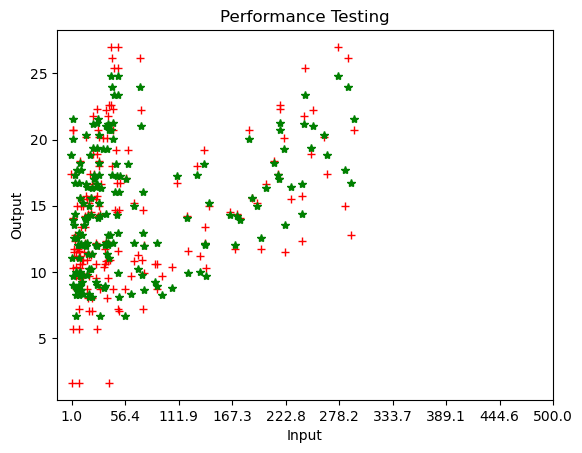

In [56]:
plt.plot(x_test, y_test, "+", color = "red")
plt.plot(x_test, predicted_value, "*", color = "green")
plt.title("Performance Testing")
plt.xlabel("Input")
plt.xticks(np.linspace(1,500,10))
plt.ylabel("Output")
plt.show()

## Linear Regression with OLS summary

In [59]:
x_with_constant = sm.add_constant(x_train)

In [61]:
x_with_constant

,const,Feature 1,Feature 2,Feature 3
188,1.0,286.0,13.9,3.7
170,1.0,50.0,11.6,18.4
107,1.0,90.4,0.3,23.2
65,1.0,69.0,9.3,0.9
109,1.0,255.4,26.9,5.5
...,...,...,...,...
50,1.0,199.8,3.1,34.6
184,1.0,253.8,21.3,30.0
165,1.0,234.5,3.4,84.8
7,1.0,120.2,19.6,11.6


In [63]:
model = sm.OLS(y_train, x_with_constant)

In [65]:
result = model.fit()

In [67]:
result

In [71]:
result.params

const        3.223109
Feature 1    0.043742
Feature 2    0.198189
Feature 3   -0.005201
dtype: float64

In [73]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     503.7
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           1.97e-73
Time:                        11:49:46   Log-Likelihood:                -254.62
No. Observations:                 140   AIC:                             517.2
Df Residuals:                     136   BIC:                             529.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2231      0.324      9.951      0.0

In [75]:
x_test = sm.add_constant(x_test)

In [77]:
y_predict = result.predict(x_test)

In [85]:
residual = y_test - y_predict

In [87]:
residual

96    -0.829436
5     -5.705002
116    0.187102
35    -3.907176
183    2.248116
160    0.203913
54    -0.139179
134   -1.346064
90     1.179631
191    1.265165
139    0.697420
142    0.849113
177   -0.330734
26    -0.215185
89    -0.532022
140    1.164141
171    0.185777
23    -0.922450
132   -3.270346
37    -1.343438
151    1.672658
28    -0.457842
85     0.221042
93     1.144262
174   -2.056963
75    -3.458207
18     1.082282
105    1.055829
121   -1.084010
130   -9.456746
33    -1.403107
46     1.676875
168    0.077268
169   -2.726377
11     0.049833
166   -3.345632
81    -2.033014
111    0.594029
67     1.262994
147    2.058085
86     0.072433
182    2.043407
69     1.034688
125    1.358701
42    -0.846124
77     0.131501
62    -0.920423
154    0.029837
59     0.162329
148   -1.910399
175    2.190807
24     1.349789
143    1.650755
64     0.710199
196    1.427431
40     0.263952
112    0.151859
52     1.852693
145    0.610187
136   -2.523880
dtype: float64

In [89]:
np.mean(residual)

-0.2807942041172696